In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glasbey
import seaborn as sns

import time
import pickle
import memory_profiler

%load_ext memory_profiler
from pathlib import Path

In [2]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [3]:
%load_ext autoreload
%autoreload 2


from pubmed_landscape_src.plotting import (
    plot_tsne_colors,
)

In [4]:
variables_path = Path("../../results/variables/2024_baseline")
figures_path = Path("../../results/figures/2024_baseline")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [5]:
pwd

'/gpfs01/berens/user/rgonzalesmarquez/phd/pubmed-landscape/scripts/2024-baseline'

In [6]:
plt.style.use("../matplotlib_style.txt")

# Import data

In [34]:
%%time
%%memit
# import clean_2024_df

clean_2024_df = pd.read_pickle(variables_path / "clean_2024_df")

peak memory: 73167.80 MiB, increment: 24274.66 MiB
CPU times: user 1min 6s, sys: 57.5 s, total: 2min 3s
Wall time: 2min 12s


In [8]:
clean_2024_df.tail()

PMID                                              Title  \
36555425  38096615      Does muscle-type myosin have ADPase activity?   
36555426  38096616  NDUFA8 is transcriptionally regulated by EP300...   
36555427  38096617  Nardilysin determines hematopoietic stem cell ...   
36555428  38096618  The role of integrin αvβ3 in biphasic calcium ...   
36555429  38096619  Risk prediction models for postoperative delir...   

                                               AbstractText Language  \
36555425  Adenosine diphosphate (ADP) is a nucleotide th...      eng   
36555426  Cervical cancer, a common malignancy in women,...      eng   
36555427  Nardilysin (NRDC) is a multifunctional protein...      eng   
36555428  Calcium phosphate ceramics-based biomaterials ...      eng   
36555429  Elderly patients with fragility hip fracture c...      eng   

                                                    Journal         Date  \
36555425  Biochemical and biophysical research communica...  2023 Dec 09   
36555426  Biochemical and biophysical research communica...  2023 Dec 10   
36555427  Biochemical and biophysical research communica...  2023 Dec 06   
36555428                                       Biomaterials  2023 Dec 01   
36555429  International journal of orthopaedic and traum...  2023 Dec 10   

         NameFirstAuthor NameLastAuthor       ISSN  \
36555425          Ilya G   Vyacheslav A  1090-2104   
36555426          Huaguo       Yingzhen  1090-2104   
36555427      Shinichiro            Ryo  1090-2104   
36555428        Hanghang             En  1878-5905   
36555429        Bingqian           Hong  1878-1292   

                                     AffiliationFirstAuthor  \
36555425  Laboratory of Cell Biophysics, A.V. Zhirmunsky...   
36555426  Department of Clinical Laboratory, Fuyong Peop...   
36555427  Department of Hematology and Oncology, Graduat...   
36555428  State Key Laboratory of Oral Diseases & Nation...   
36555429  Tianjin University of Traditional Chinese Medi...   

                                      AffiliationLastAuthor           filename  
36555425  Laboratory of Cell Biophysics, A.V. Zhirmunsky...  pubmed24n1219.xml  
36555426  Department of Clinical Laboratory, Fuyong Peop...  pubmed24n1219.xml  
36555427  Institute for the Advanced Study of Human Biol...  pubmed24n1219.xml  
36555428  State Key Laboratory of Oral Diseases & Nation...  pubmed24n1219.xml  
36555429  Tianjin Hospital Trauma Upper Extremity Ward I...  pubmed24n1219.xml

In [18]:
clean_2024_df.PMID.iloc[0]

'24'

# First author's affiliation country

In [9]:
all_countries = [
    "Afghanistan",
    "Albania",
    "Algeria",
    "Andorra",
    "Angola",
    "Antigua and Barbuda",
    "Argentina",
    "Armenia",
    "Australia",
    "Austria",
    "Azerbaijan",
    "Bahamas",
    "Bahrain",
    "Bangladesh",
    "Barbados",
    "Belarus",
    "Belgium",
    "Belize",
    "Benin",
    "Bhutan",
    "Bolivia",
    "Bosnia and Herzegovina",
    "Botswana",
    "Brazil",
    "Brunei",
    "Bulgaria",
    "Burkina Faso",
    "Burundi",
    "Cabo Verde",
    "Cambodia",
    "Cameroon",
    "Canada",
    "Central African Republic",
    "Chad",
    "Chile",
    "China",
    "Colombia",
    "Comoros",
    "Democratic Republic of the Congo",
    "Republic of the Congo",
    "Costa Rica",
    "Côte d’Ivoire",
    "Croatia",
    "Cuba",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Djibouti",
    "Dominica",
    "Dominican Republic",
    "East Timor",
    "Ecuador",
    "Egypt",
    "El Salvador",
    "Equatorial Guinea",
    "Eritrea",
    "Estonia",
    "Eswatini",
    "Ethiopia",
    "Fiji",
    "Finland",
    "France",
    "Gabon",
    "Gambia",
    "Georgia",
    "Germany",
    "Ghana",
    "Greece",
    "Grenada",
    "Guatemala",
    "Guinea",
    "Guinea-Bissau",
    "Guyana",
    "Haiti",
    "Honduras",
    "Hungary",
    "Iceland",
    "India",
    "Indonesia",
    "Iran",
    "Iraq",
    "Ireland",
    "Israel",
    "Italy",
    "Jamaica",
    "Japan",
    "Jordan",
    "Kazakhstan",
    "Kenya",
    "Kiribati",
    "North Korea",
    "South Korea",
    "Kosovo",
    "Kuwait",
    "Kyrgyzstan",
    "Laos",
    "Latvia",
    "Lebanon",
    "Lesotho",
    "Liberia",
    "Libya",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Madagascar",
    "Malawi",
    "Malaysia",
    "Maldives",
    "Mali",
    "Malta",
    "Marshall Islands",
    "Mauritania",
    "Mauritius",
    "Mexico",
    "Micronesia",  # , Federated States of",
    "Moldova",
    "Monaco",
    "Mongolia",
    "Montenegro",
    "Morocco",
    "Mozambique",
    "Myanmar",
    "Namibia",
    "Nauru",
    "Nepal",
    "Netherlands",
    "New Zealand",
    "Nicaragua",
    "Niger",
    "Nigeria",
    "North Macedonia",
    "Norway",
    "Oman",
    "Pakistan",
    "Palau",
    "Panama",
    "Papua New Guinea",
    "Paraguay",
    "Peru",
    "Philippines",
    "Poland",
    "Portugal",
    "Qatar",
    "Romania",
    "Russia",
    "Rwanda",
    "Saint Kitts and Nevis",
    "Saint Lucia",
    "Saint Vincent and the Grenadines",
    "Samoa",
    "San Marino",
    "Sao Tome and Principe",
    "Saudi Arabia",
    "Senegal",
    "Serbia",
    "Seychelles",
    "Sierra Leone",
    "Singapore",
    "Slovakia",
    "Slovenia",
    "Solomon Islands",
    "Somalia",
    "South Africa",
    "Spain",
    "Sri Lanka",
    "Sudan",
    "South Sudan",
    "Suriname",
    "Sweden",
    "Switzerland",
    "Syria",
    "Taiwan",
    "Tajikistan",
    "Tanzania",
    "Thailand",
    "Togo",
    "Tonga",
    "Trinidad and Tobago",
    "Tunisia",
    "Turkey",
    "Turkmenistan",
    "Tuvalu",
    "Uganda",
    "Ukraine",
    "United Arab Emirates",
    "United Kingdom",
    "United States",
    "Uruguay",
    "Uzbekistan",
    "Vanuatu",
    "Vatican City",
    "Venezuela",
    "Vietnam",
    "Yemen",
    "Zambia",
    "Zimbabwe",
]

In [10]:
dict_countries = dict(zip(all_countries, np.arange(1, len(all_countries) + 1)))

In [11]:
def mapping_countries(affiliations, dict_countries):
    """Maps countries to affiliation strings.
    The affiliation strings include the country name, so it searches for all possible country names in the strings.
    This produces a list of countries, correcting and assigning only one out of all possible different country names (e.g., "US" and "USA").
    
    Parameters
    ----------
    affiliations : dataframe of str
        Dataframe with the affiliation names of the papers.
    dict_countries : dict
        Dictionary matching country to number (legend).


    Returns
    -------
    labels : list of str fo len (affiliations)
        List of countries for all papers including 'unknown'. 
    numbers : array
        Numbers for each paper. Each number corresponds to a country.

    """

    # create inverse dict
    inv_dict = {v: k for k, v in dict_countries.items()}
    inv_dict[0] = "unknown"

    # add special cases
    dict_countries["United States of America"] = dict_countries[
        "United States"
    ]
    dict_countries["USA"] = dict_countries["United States"]
    dict_countries["America"] = dict_countries["United States"]
    dict_countries["UK"] = dict_countries["United Kingdom"]
    dict_countries["Republic of Korea"] = dict_countries["South Korea"]
    dict_countries["Korea"] = dict_countries["South Korea"]

    countries = dict_countries.keys()
    numbers = np.zeros(len(affiliations))

    for country in countries:
        country_str = " " + country
        country_upper = country.upper()

        indexes1 = affiliations.str.find(country_str)
        indexes2 = affiliations.str.find(country_upper)

        numbers = np.where(
            (indexes1 != -1) | (indexes2 != -1),
            dict_countries[country],
            numbers,
        )

    # create labels
    labels = np.vectorize(inv_dict.get)(numbers)

    # add unknown to the rest of papers
    labels = np.where(labels == None, "unknown", labels)
    labels = np.where(labels == "None", "unknown", labels)


    return labels, numbers

## Country mapping

In [9]:
affil_first = clean_2024_df.AffiliationFirstAuthor  # .to_list()
affil_first

21                                                           
22                                                           
24                                                           
29                                                           
31                                                           
                                  ...                        
36555425    Laboratory of Cell Biophysics, A.V. Zhirmunsky...
36555426    Department of Clinical Laboratory, Fuyong Peop...
36555427    Department of Hematology and Oncology, Graduat...
36555428    State Key Laboratory of Oral Diseases & Nation...
36555429    Tianjin University of Traditional Chinese Medi...
Name: AffiliationFirstAuthor, Length: 23389083, dtype: object

In [14]:
%%time
labels, numbers = mapping_countries(affil_first, dict_countries)

CPU times: user 1h 22min 57s, sys: 2min 44s, total: 1h 25min 42s
Wall time: 1h 25min 33s


In [26]:
np.save(variables_path / "countries_first_author_2024", labels)
np.save(variables_path / "countries_numbers_first_author_2024", numbers)

### Create color legend

In [ ]:
labels = np.load(variables_path / "countries_first_author_2024.npy")
numbers = np.load(variables_path / "countries_numbers_first_author_2024.npy")

In [13]:
%%time
names, counts = np.unique(labels[labels != "unknown"], return_counts=True)

CPU times: user 9.13 s, sys: 927 ms, total: 10.1 s
Wall time: 10.1 s


In [14]:
n = 10
print(names[np.flip(np.argsort(counts))][:n])
print(counts[np.flip(np.argsort(counts))][:n])

['United States' 'China' 'Japan' 'United Kingdom' 'Germany' 'Italy'
 'Canada' 'France' 'India' 'Australia']
[4540796 2196084 1191741 1082859  931027  722195  668839  598647  566286
  517021]


In [ ]:
n = 10
colormap = glasbey.create_palette(
    palette_size=n,
    lightness_bounds=(20, 75),
    chroma_bounds=(40, 90),
)
colormap_modified = colormap.copy()
colormap_modified[0] = colormap[1]
colormap_modified[1] = colormap[0]

In [23]:
colors_countries_legend_2024 = dict(
    zip(names[np.flip(np.argsort(counts))][:10], colormap_modified)
)

In [24]:
# save results
f = open(variables_path / "colors_countries_legend_2024.pkl", "wb")
pickle.dump(colors_countries_legend_2024, f)
f.close()

## State mapping

In [ ]:
all_states = [
    "Alabama",
    "Alaska",
    "Arizona",
    "Arkansas",
    "California",
    "Colorado",
    "Connecticut",
    "Delaware",
    "Florida",
    "Georgia",
    "Hawaii",
    "Idaho",
    "Illinois",
    "Indiana",
    "Iowa",
    "Kansas",
    "Kentucky",
    "Louisiana",
    "Maine",
    "Maryland",
    "Massachusetts",
    "Michigan",
    "Minnesota",
    "Mississippi",
    "Missouri",
    "Montana",
    "Nebraska",
    "Nevada",
    "New Hampshire",
    "New Jersey",
    "New Mexico",
    "New York",
    "North Carolina",
    "North Dakota",
    "Ohio",
    "Oklahoma",
    "Oregon",
    "Pennsylvania",
    "Rhode Island",
    "South Carolina",
    "South Dakota",
    "Tennessee",
    "Texas",
    "Utah",
    "Vermont",
    "Virginia",
    "Washington",
    "West Virginia",
    "Wisconsin",
    "Wyoming",
]

In [ ]:
len(all_states)

50

In [ ]:
dict_all_states = dict(zip(all_states, np.arange(1, len(all_states) + 1)))
dict_all_states

{'Alabama': 1,
 'Alaska': 2,
 'Arizona': 3,
 'Arkansas': 4,
 'California': 5,
 'Colorado': 6,
 'Connecticut': 7,
 'Delaware': 8,
 'Florida': 9,
 'Georgia': 10,
 'Hawaii': 11,
 'Idaho': 12,
 'Illinois': 13,
 'Indiana': 14,
 'Iowa': 15,
 'Kansas': 16,
 'Kentucky': 17,
 'Louisiana': 18,
 'Maine': 19,
 'Maryland': 20,
 'Massachusetts': 21,
 'Michigan': 22,
 'Minnesota': 23,
 'Mississippi': 24,
 'Missouri': 25,
 'Montana': 26,
 'Nebraska': 27,
 'Nevada': 28,
 'New Hampshire': 29,
 'New Jersey': 30,
 'New Mexico': 31,
 'New York': 32,
 'North Carolina': 33,
 'North Dakota': 34,
 'Ohio': 35,
 'Oklahoma': 36,
 'Oregon': 37,
 'Pennsylvania': 38,
 'Rhode Island': 39,
 'South Carolina': 40,
 'South Dakota': 41,
 'Tennessee': 42,
 'Texas': 43,
 'Utah': 44,
 'Vermont': 45,
 'Virginia': 46,
 'Washington': 47,
 'West Virginia': 48,
 'Wisconsin': 49,
 'Wyoming': 50}

In [ ]:
def mapping_states(affiliations, dict_countries):
    """Maps USA states to affiliation strings.
    
    Parameters
    ----------
    affiliations : dataframe of str
        Dataframe with the affiliation names of the papers.
    dict_countries : dict
        Dictionary matching country to number (legend).


    Returns
    -------
    labels : list of str fo len (affiliations)
        List of states for all papers including 'unknown'. 
    numbers : array
        Numbers for each paper. Each number corresponds to a country.

    See Also
    --------
    mapping_countries

    """
    # create inverse dict
    inv_dict = {v: k for k, v in dict_countries.items()}
    inv_dict[0] = "unknown"


    countries = dict_countries.keys()
    numbers = np.zeros(len(affiliations))

    for country in countries:
        country_str = " " + country
        country_upper = country.upper()

        indexes1 = affiliations.str.find(country_str)
        indexes2 = affiliations.str.find(country_upper)

        numbers = np.where(
            (indexes1 != -1) | (indexes2 != -1),
            dict_countries[country],
            numbers,
        )

    # create labels
    labels = np.vectorize(inv_dict.get)(numbers)

    # add unknown to the rest of papers
    labels = np.where(labels == None, "unknown", labels)
    labels = np.where(labels == "None", "unknown", labels)

    return labels, numbers

In [ ]:
%%time
labels_usa_states_2024, numbers = mapping_states(
    clean_2024_df.AffiliationFirstAuthor, dict_all_states
)

CPU times: user 20min 39s, sys: 32.9 s, total: 21min 12s
Wall time: 21min 13s


In [ ]:
np.save(
    variables_path / "labels_usa_states_first_author_2024",
    labels_usa_states_2024,
)

### Analysis

In [ ]:
%%time
names_states, counts_states = np.unique(
    labels_usa_states_2024[labels_usa_states_2024 != "unknown"],
    return_counts=True,
)

CPU times: user 1.31 s, sys: 400 µs, total: 1.31 s
Wall time: 1.31 s


In [ ]:
n = 20
print(names_states[np.flip(np.argsort(counts_states))][:n])
print(counts_states[np.flip(np.argsort(counts_states))][:n])

['California' 'New York' 'Texas' 'Washington' 'Massachusetts'
 'Pennsylvania' 'Maryland' 'Michigan' 'Illinois' 'North Carolina'
 'Florida' 'Ohio' 'Minnesota' 'Wisconsin' 'Georgia' 'Virginia' 'Colorado'
 'Indiana' 'Tennessee' 'Connecticut']
[523808 392110 287183 254151 231982 198881 173702 151960 140571 138350
 132637 131417  99527  98944  94883  89327  80312  71235  63838  61910]


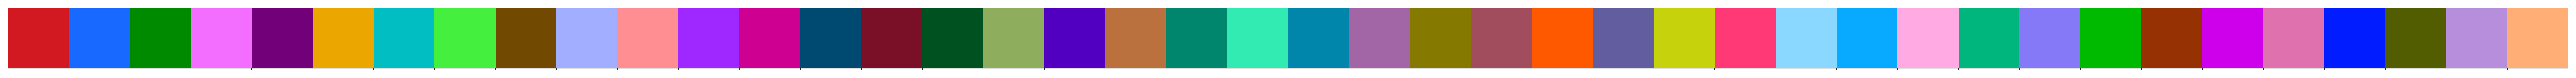

In [ ]:
colormap = glasbey.create_palette(
    palette_size=42,
    lightness_bounds=(20, 75),
    chroma_bounds=(40, 90),
)


sns.palplot(colormap)

In [ ]:
colors_states_legend_n_20 = dict(
    zip(names_states[np.flip(np.argsort(counts_states))][:20], colormap[22:])
)

In [ ]:
%%time
n = 20

years = np.arange(1970, 2025)

counts_states_years = np.zeros((n, len(years)))

for i, state in enumerate(
    names_states[np.flip(np.argsort(counts_states))][:n]
):
    print(state)
    for j in np.arange(len(years)):
        years_state = date_year_2024[labels_usa_states_2024 == state]
        counts_states_years[i, j] = np.sum([years_state == years[j]])

California


New York
Texas
Washington
Massachusetts
Pennsylvania
Maryland
Michigan
Illinois
North Carolina
Florida
Ohio
Minnesota
Wisconsin
Georgia
Virginia
Colorado
Indiana
Tennessee
Connecticut
CPU times: user 2min 13s, sys: 1.43 s, total: 2min 14s
Wall time: 2min 14s


In [ ]:
counts_states_years

array([[1.4900e+02, 1.2600e+02, 9.7000e+01, ..., 2.0546e+04, 2.1440e+04,
        2.1400e+02],
       [7.4000e+01, 9.1000e+01, 4.9000e+01, ..., 1.5886e+04, 1.6770e+04,
        2.2200e+02],
       [2.9000e+01, 2.5000e+01, 2.4000e+01, ..., 1.2361e+04, 1.2873e+04,
        1.5300e+02],
       ...,
       [1.9000e+01, 1.3000e+01, 1.5000e+01, ..., 2.7840e+03, 2.8790e+03,
        3.1000e+01],
       [6.0000e+00, 1.0000e+01, 5.0000e+00, ..., 2.4910e+03, 2.6540e+03,
        3.3000e+01],
       [1.4000e+01, 1.4000e+01, 2.0000e+01, ..., 2.3500e+03, 2.3620e+03,
        3.0000e+01]])

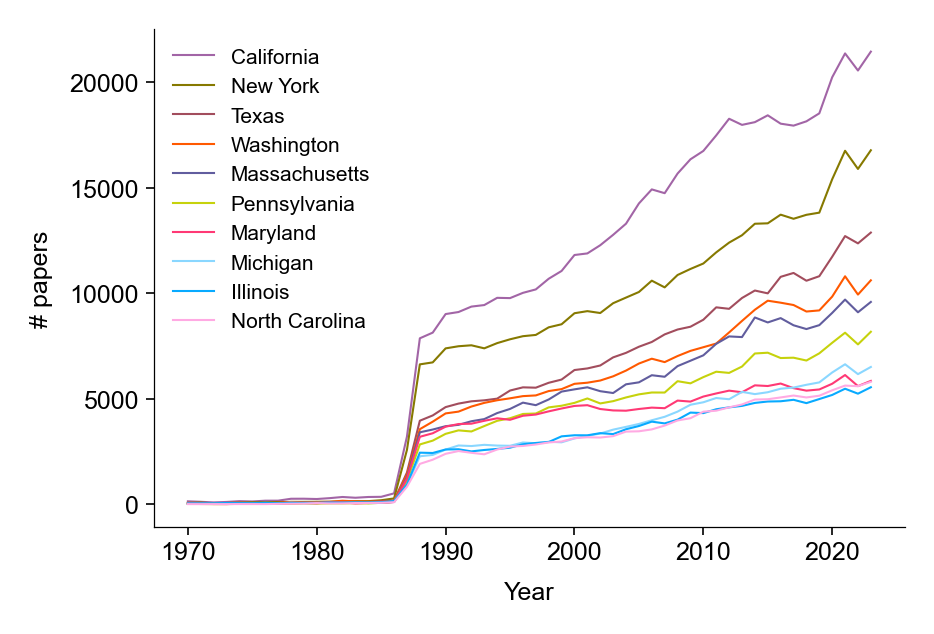

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), layout="constrained")

n = 10
for i, state in enumerate(
    names_states[np.flip(np.argsort(counts_states))][:n]
):
    # print(country)
    ax.plot(
        years[:-1],
        counts_states_years[i, :-1],
        # "--",
        # marker=".",
        ms=1,
        color=colors_states_legend_n_20[state],
        label=state,
    )


ax.set_xlabel("Year")
ax.set_ylabel("# papers")
# ax.set_yscale("log")
ax.legend(loc="upper left", fontsize=5)

fig.savefig(
    figures_path / f"papers_from_top_{n}_usa_states_per_year_2024_v1.png"
)

## Correct USA country with states

In [ ]:
countries_first_author_2024 = np.load(
    variables_path / "countries_first_author_2024.npy"
)

In [ ]:
labels_usa_states_first_author_2024 = np.load(
    variables_path / "labels_usa_states_first_author_2024.npy"
)

In [ ]:
countries_first_author_2024_usa_corrected = np.where(
    labels_usa_states_first_author_2024 != "unknown",
    "United States",
    countries_first_author_2024,
)

In [ ]:
print(
    np.sum(countries_first_author_2024 == "United States")
    / countries_first_author_2024.shape[0]
    * 100
)
print(
    np.sum(countries_first_author_2024_usa_corrected == "United States")
    / countries_first_author_2024.shape[0]
    * 100
)

19.414168567446616
24.30066625527816


In [ ]:
print(
    np.sum(countries_first_author_2024 != "unknown")
    / countries_first_author_2024.shape[0]
    * 100
)
print(
    np.sum(countries_first_author_2024_usa_corrected != "unknown")
    / countries_first_author_2024.shape[0]
    * 100
)

80.75467943741104
85.2445262603925


In [ ]:
print(np.sum(countries_first_author_2024_usa_corrected != "unknown"))

19937913


In [ ]:
np.save(
    variables_path / "countries_first_author_2024_usa_corrected",
    countries_first_author_2024_usa_corrected,
)

## Papers per year

In [ ]:
countries_first_author_2024_usa_corrected = np.load(
    variables_path / "countries_first_author_2024_usa_corrected.npy",
)

In [ ]:
# legend colors
pickle_in = open(variables_path / "colors_countries_legend_2024.pkl", "rb")
colors_countries_legend_2024 = pickle.load(pickle_in)

In [ ]:
# save
date_year_2024 = np.load(variables_path / "date_year_2024.npy")

In [ ]:
%%time
names, counts = np.unique(
    countries_first_author_2024_usa_corrected[
        countries_first_author_2024_usa_corrected != "unknown"
    ],
    return_counts=True,
)

CPU times: user 9.84 s, sys: 567 ms, total: 10.4 s
Wall time: 10.4 s


In [ ]:
%%time
n = 10

years = np.arange(1970, 2025)

counts_countries_corrected = np.zeros((n, len(years)))

for i, country in enumerate(names[np.flip(np.argsort(counts))][:n]):
    print(country)
    for j in np.arange(len(years)):
        years_country = date_year_2024[
            countries_first_author_2024_usa_corrected == country
        ]
        counts_countries_corrected[i, j] = np.sum([years_country == years[j]])

United States


China
Japan
United Kingdom
Germany
Italy
Canada
France
India
Australia
CPU times: user 2min 40s, sys: 110 ms, total: 2min 40s
Wall time: 2min 40s


In [ ]:
%%time

years = np.arange(1970, 2025)

counts_missing_countries_corrected = np.zeros(len(years))
counts_missing_affil = np.zeros(len(years))

for j in np.arange(len(years)):
    years_country = date_year_2024[
        countries_first_author_2024_usa_corrected != "unknown"
    ]
    years_affil = date_year_2024[
        clean_2024_df.AffiliationFirstAuthor.to_numpy() != ""
    ]

    counts_missing_countries_corrected[j] = np.sum([years_country == years[j]])
    counts_missing_affil[j] = np.sum([years_affil == years[j]])

CPU times: user 46.5 s, sys: 1.52 s, total: 48 s
Wall time: 48 s


In [ ]:
# save
np.save(
    variables_path / "counts_countries_corrected", counts_countries_corrected
)
np.save(
    variables_path / "counts_missing_countries_corrected",
    counts_missing_countries_corrected,
)
np.save(variables_path / "counts_missing_affil", counts_missing_affil)

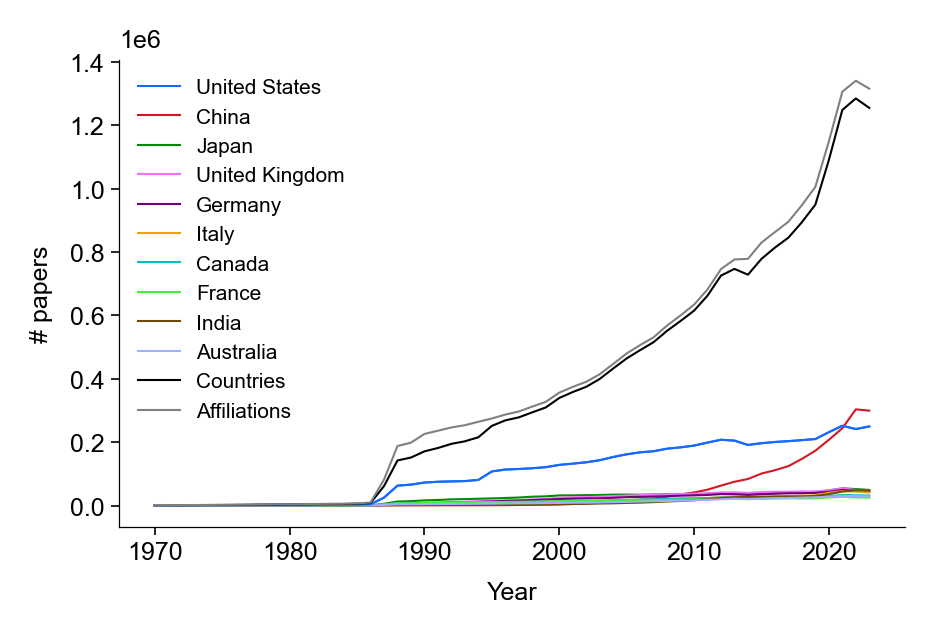

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2), layout="constrained")

n = 10
for i, country in enumerate(names[np.flip(np.argsort(counts))][:n]):
    ax.plot(
        years[:-1],
        counts_countries_corrected[i, :-1],
        # "--",
        # marker=".",
        ms=1,
        color=colors_countries_legend_2024[country],
        label=country,
    )

ax.plot(
    years[:-1],
    counts_countries_corrected[0, :-1],
    # "--",
    # marker=".",
    ms=1,
    color=colors_countries_legend_2024["United States"],
    # label=country,
)

ax.plot(
    years[:-1],
    counts_missing_countries_corrected[:-1],
    # "--",
    # marker=".",
    ms=1,
    color="black",
    label="Countries",
)

ax.plot(
    years[:-1],
    counts_missing_affil[:-1],
    # "--",
    # marker=".",
    ms=1,
    color="grey",
    label="Affiliations",
)


ax.set_xlabel("Year")
ax.set_ylabel("# papers")
# ax.set_yscale("log")
ax.legend(loc="upper left", fontsize=5)

fig.savefig(
    figures_path
    / f"papers_from_top_{n}_countries_per_year_2024_usa_corrected_v2.png"
)

## t-SNE plot colored by country 
Top-10 countries and the rest in dark grey

In [11]:
# load
countries_first_author_2024_usa_corrected = np.load(
    variables_path / "countries_first_author_2024_usa_corrected.npy"
)
# legend colors
pickle_in = open(variables_path / "colors_countries_legend_2024.pkl", "rb")
colors_countries_legend_2024 = pickle.load(pickle_in)

In [12]:
%%time

colors_countries_first_author_2024_usa_corrected = np.vectorize(
    colors_countries_legend_2024.get
)(countries_first_author_2024_usa_corrected)

# add grey to the rest of papers
colors_countries_first_author_2024_usa_corrected = np.where(
    colors_countries_first_author_2024_usa_corrected == None,
    "lightgrey",
    colors_countries_first_author_2024_usa_corrected,
)
colors_countries_first_author_2024_usa_corrected = np.where(
    colors_countries_first_author_2024_usa_corrected == "None",
    "lightgrey",
    colors_countries_first_author_2024_usa_corrected,
)

CPU times: user 4.84 s, sys: 906 ms, total: 5.75 s
Wall time: 5.74 s


In [13]:
np.save(
    variables_path / "colors_countries_first_author_2024_usa_corrected",
    colors_countries_first_author_2024_usa_corrected,
)

In [22]:
%%time
# add dark grey
colors_countries_first_author_2024_usa_corrected_with_black = np.where(
    colors_countries_first_author_2024_usa_corrected == "lightgrey",
    "#474747",
    colors_countries_first_author_2024_usa_corrected,
)
colors_countries_first_author_2024_usa_corrected_with_black = np.where(
    countries_first_author_2024_usa_corrected == "unknown",
    "lightgrey",
    colors_countries_first_author_2024_usa_corrected_with_black,
)

CPU times: user 1.25 s, sys: 114 ms, total: 1.36 s
Wall time: 1.36 s


In [23]:
np.save(
    variables_path
    / "colors_countries_first_author_2024_usa_corrected_with_black",
    colors_countries_first_author_2024_usa_corrected_with_black,
)

#### Plot

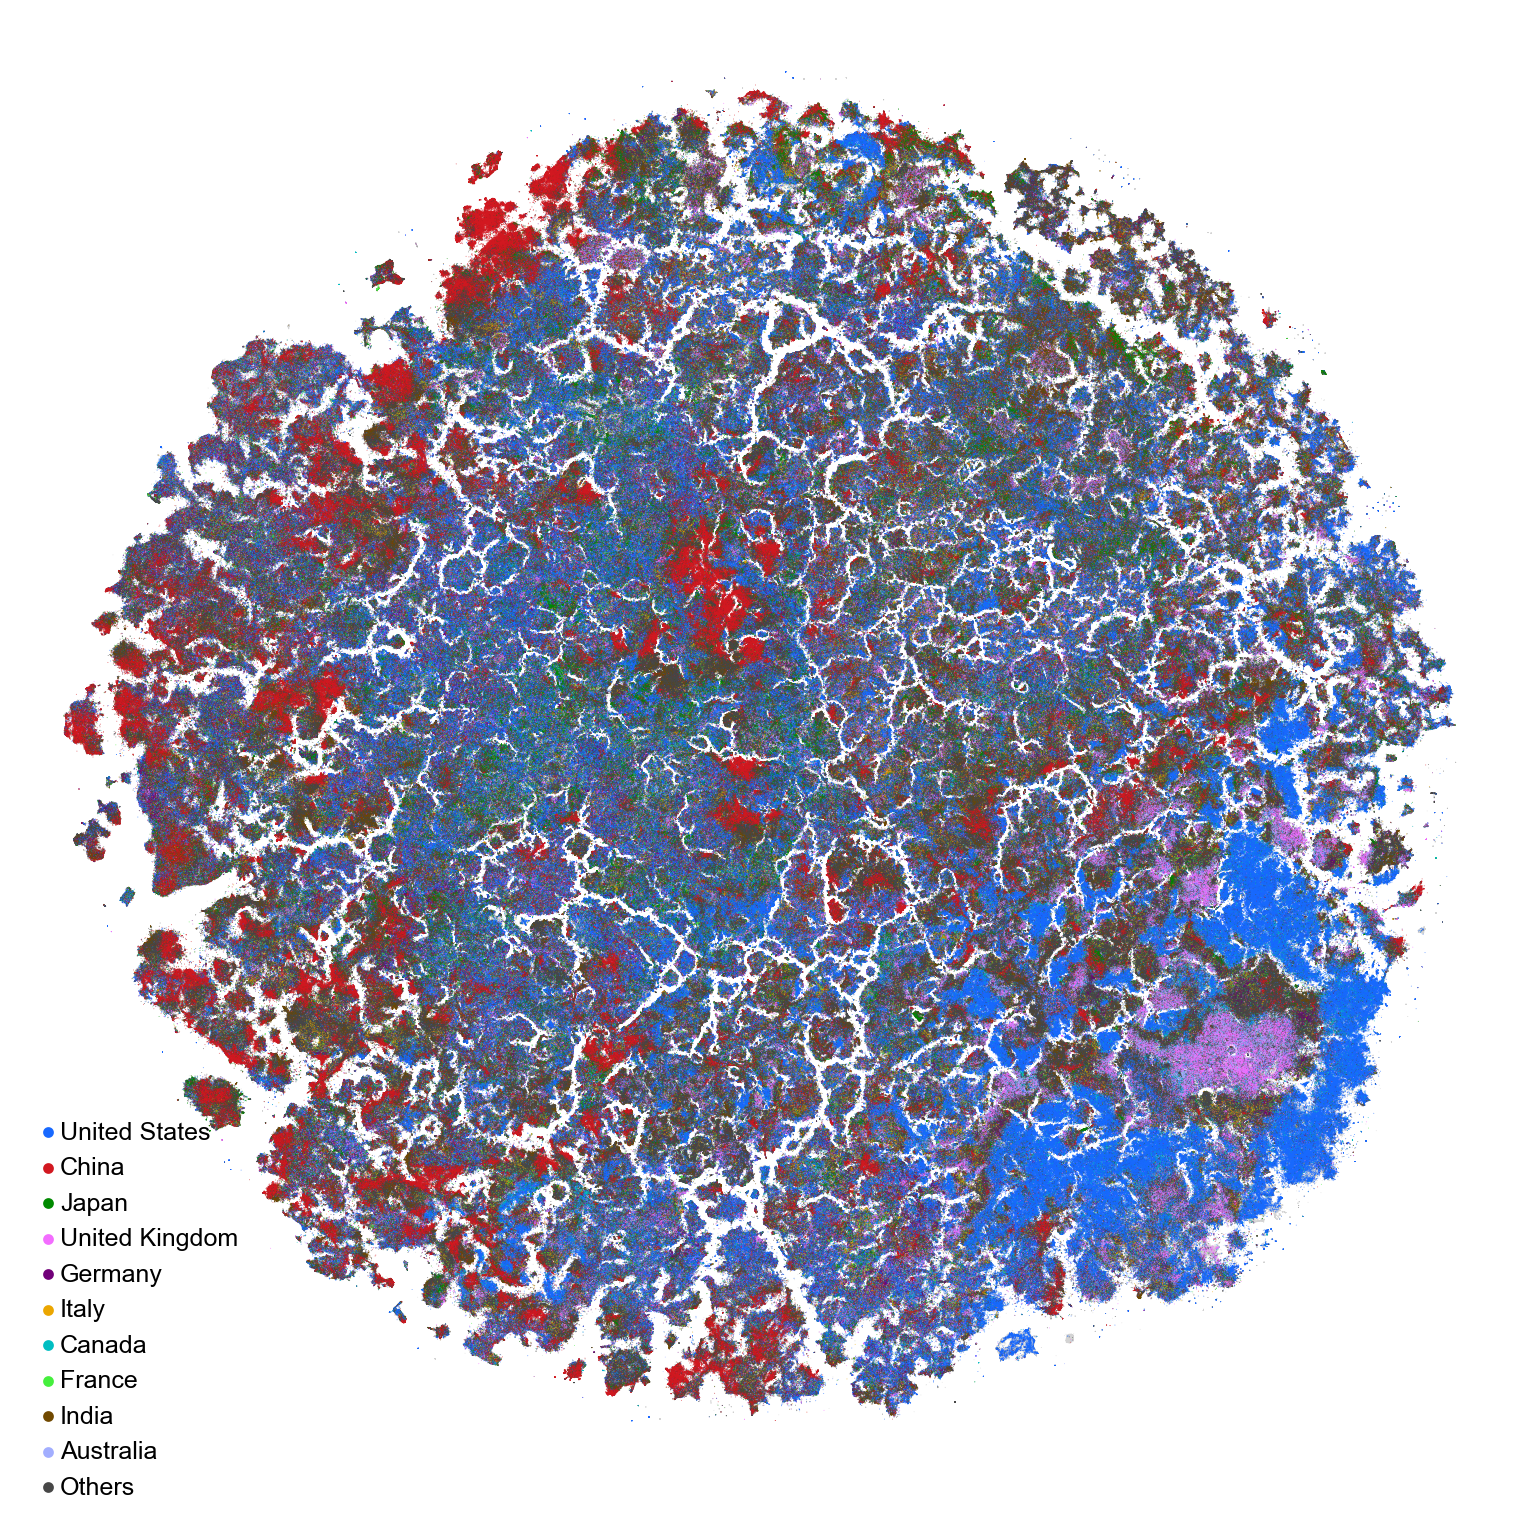

In [24]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5), dpi=300, layout="constrained")

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")
x_lim = (-230, 230)
y_lim = (-230, 230)


plot_tsne_colors(
    tsne_rot,
    colors_countries_first_author_2024_usa_corrected_with_black,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax,
    plot_type="subplot_2",
)

all_keys = []
for key, value in colors_countries_legend_2024.items():
    key = ax.scatter([], [], c=value, s=10, alpha=1, label=key)
    all_keys.append(key)

key = ax.scatter([], [], c="#474747", s=10, alpha=1, label="Others")
all_keys.append(key)

ax.legend(
    handles=all_keys,
    loc="lower left",
    fontsize=6,
    frameon=False,
    borderpad=0.2,
    handletextpad=0,
    handlelength=1,
    borderaxespad=0,
)  # -0.2 before


fig.savefig(
    figures_path
    / "tsne_colored_by_country_n_10_and_black_usa_corrected_v1.png"
)